# 3d elastic analysis example

## Mesh generation

In [25]:
# Loading the finite element package Amaru
using Revise
using PyPlot
using Amaru

In [26]:
# Mesh generation
blocks = [
    Block3D( [0 0 0; 1 1 1], nx=10, ny=10, nz=10, shape=HEX8),
]

msh = Mesh(blocks, verbose=true);

Mesh generation:
  analyzing 1 block(s)
  3D mesh             
   1331 points obtained
   1000 cells obtained
    600 faces obtained
   1200 surface edges obtained
  done.


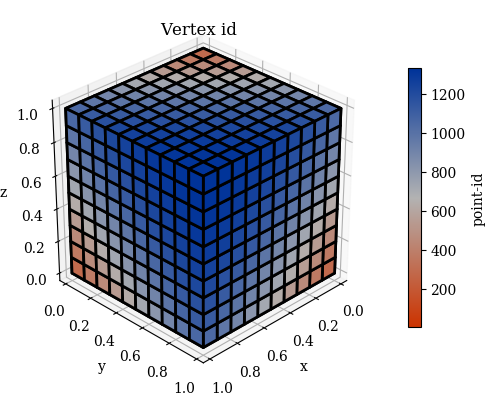

PyObject <matplotlib.text.Text object at 0x7fdc2a0b6f10>

In [31]:
mplot(msh, field="point-id")
title("Vertex id")

## Finite element modeling 

In [28]:
# Finite element modeling

materials = [
    MaterialBind(:solids, ElasticSolid(E=100.0, nu=0.2) ),
]

loggers = [
    GroupLogger(:ip, :(x>0))  # monitor a group of IPs that match the given condition
]

domain = Domain(msh, materials, loggers);

Domain setup:
  3D domain general model      
   1331 nodes
   1000 elements
    600 faces
   1200 edges
      1 materials
      1 loggers
  done.


In [29]:
# Set the boundary conditions
bcs = [
    BC(:node, :(z==0), :(ux=0, uy=0, uz=0) ),
    BC(:face, :(z==1), :(tz=-10*x) ),          # triangular load
]

# Perform the finite element analysis
solve!(domain, bcs, nincs=1, verbose=true)

save(domain, "dom1.vtk")

FEM analysis:
  unknown dofs: 3630
  increment 1 from t=0.0 to t=1.0 (dt=1.0):
    it 1   residue: 6.2103e-16
  time spent: 0.0h 0.0m 1.908s
  file dom1.vtk written (Domain)


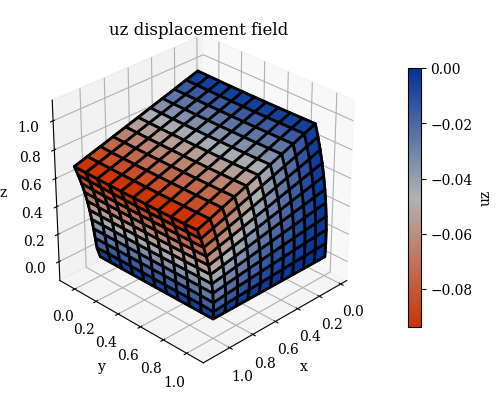

In [30]:
mplot(domain, field="uz", warpscale=3.0)
title("uz displacement field");